# Reddit Classification 

## Notebook 5 of 5 - Hugging Face Models + Evaluation + Conclusion + Limitations + Recommendations/Further Research

# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline # to compactly pack multiple modeling operations

from datetime import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm
sns.set_theme()

In [5]:
anxiety_depression = pd.read_csv('datasets/anxiety_depression.csv')

In [6]:
anxiety_depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29907 entries, 0 to 29906
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   is_anxiety         29907 non-null  int64 
 1   title_text         29907 non-null  object
 2   date_time          29907 non-null  object
 3   title_text_re      29907 non-null  object
 4   status_length      29907 non-null  int64 
 5   status_word_count  29907 non-null  int64 
 6   day                29907 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.6+ MB


# Further Studies on emotions of the subreddit posts

- Other than correctly classifying the post to the topics, further investigation is done to know if there are other emotions when a redditor contributes to the subreddit.
- Two Models were used.
- Model 1: [j-hartmann/emotion-english-distilroberta-base](https://huggingface.co/j-hartmann/emotion-english-distilroberta-base)
- Model 2: [arpanghoshal/EmoRoBERTa](https://huggingface.co/arpanghoshal/EmoRoBERTa?text=I+like+you.+I+love+you)

In [4]:
# There are 96.4% of post with less than 512 words.
(anxiety_depression['status_word_count']<512).sum()/len(anxiety_depression)*100

96.41889858561541

This is important for using hugging face models as there are restrictions of the tokenizer in the hugging face models which restricts to a maximum of 512 words per document.

## Model 1: j-hartmann/emotion-english-distilroberta-base

Human emotions has been classified to [6 basic emotions](https://www.paulekman.com/universal-emotions/). by Paul Ekman.  This model includes 6 basic emotions + neutral which has been trained on a diverse collection of text types. Specifically, they contain emotion labels for texts from Twitter, Reddit, student self-reports, and utterances from TV dialogues.

In [5]:
from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", truncation=True)

In [6]:
def classify(df):
    labels=[]
    scores=[]
    for i in tqdm(df['title_text_re'], desc = 'tqdm() Progress Bar'): 
        index = 0
        if index < len(df):
            output = classifier([i])
            labels.append(output[0]['label'])
            scores.append(output[0]['score'])
            index += 1
    df['labels_jhart'] = pd.DataFrame(labels)
    df['scores_jhart'] = pd.DataFrame(scores)
    return

In [7]:
%%time
classifies = classify(anxiety_depression)

%store classifies

tqdm() Progress Bar: 100%|██████████| 29907/29907 [44:58<00:00, 11.08it/s]  


Stored 'classifies' (NoneType)
CPU times: total: 4h 29min 35s
Wall time: 44min 58s


In [8]:
anxiety_depression = anxiety_depression
%store anxiety_depression

Stored 'anxiety_depression' (DataFrame)


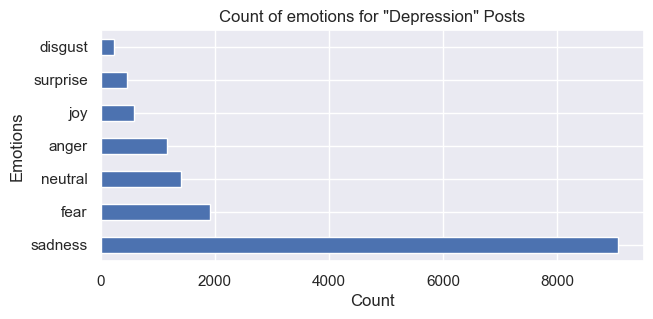

In [8]:
# Plot of top count of emotions for subreddit 'Depression'
plt.figure(figsize=(7,3))
plt.title('Count of emotions for "Depression" Posts')
plt.xlabel('Count')
plt.ylabel('Emotions')
anxiety_depression[anxiety_depression['is_anxiety'] == 0]['labels_jhart'].value_counts().plot(kind='barh');

In [10]:
# Value count of emotions of 'Depression' posts
anxiety_depression[anxiety_depression['is_anxiety'] == 0]['labels_jhart'].value_counts()

sadness     9064
fear        1905
neutral     1406
anger       1162
joy          584
surprise     449
disgust      227
Name: labels_jhart, dtype: int64

In [11]:
# Percentage count of emotions of 'Depression' posts
anxiety_depression[anxiety_depression['is_anxiety'] == 0]['labels_jhart'].value_counts()/len(anxiety_depression[anxiety_depression['is_anxiety'] == 0])*100

sadness     61.255660
fear        12.874231
neutral      9.501926
anger        7.852943
joy          3.946746
surprise     3.034399
disgust      1.534095
Name: labels_jhart, dtype: float64

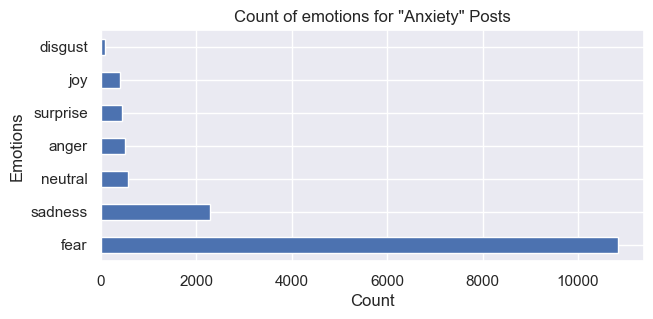

In [12]:
# Plot of top count of emotions for subreddit 'Anxiety'
plt.figure(figsize=(7,3))
plt.title('Count of emotions for "Anxiety" Posts')
plt.xlabel('Count')
plt.ylabel('Emotions')
anxiety_depression[anxiety_depression['is_anxiety'] == 1]['labels_jhart'].value_counts().plot(kind='barh');

In [13]:
# Value count of emotions of 'Anxeity' posts
anxiety_depression[anxiety_depression['is_anxiety'] == 1]['labels_jhart'].value_counts()

fear        10834
sadness      2288
neutral       567
anger         503
surprise      431
joy           393
disgust        94
Name: labels_jhart, dtype: int64

In [14]:
# Percentage count of emotions of 'Anxiety' posts
anxiety_depression[anxiety_depression['is_anxiety'] == 1]['labels_jhart'].value_counts()/len(anxiety_depression[anxiety_depression['is_anxiety'] == 0])*100

fear        73.217544
sadness     15.462594
neutral      3.831858
anger        3.399338
surprise     2.912753
joy          2.655944
disgust      0.635264
Name: labels_jhart, dtype: float64

## Model 2: arpanghoshal/EmoRoBERTa
- The second model uses Dataset labelled from 58,000 Reddit comments with 28 emotions. 
- We want to find out what are their secondary emotions from redditors post 

In [9]:
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline

tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

emotion = pipeline('sentiment-analysis', 
                    model='arpanghoshal/EmoRoBERTa',truncation=True)

emotion_labels = emotion("Thanks for using it.")
print(emotion_labels)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


[{'label': 'gratitude', 'score': 0.9964383840560913}]


In [10]:
# Function to run each document through the model to get the label and score.
def emotions(df):
    labels=[]
    scores=[]
    for i in tqdm(df['title_text_re'], desc = 'tqdm() Progress Bar'):      
        index = 0
        if index < len(df):
            output = emotion([i])
            labels.append(output[0]['label'])
            scores.append(output[0]['score'])
            index += 1
    df['labels'] = pd.DataFrame(labels)
    df['scores'] = pd.DataFrame(scores)
    return

In [11]:
%%time
emo = emotions(anxiety_depression)

%store emo

tqdm() Progress Bar: 100%|██████████| 29907/29907 [3:38:22<00:00,  2.28it/s]   

Stored 'emo' (NoneType)
CPU times: total: 15h 2min 51s
Wall time: 3h 38min 22s


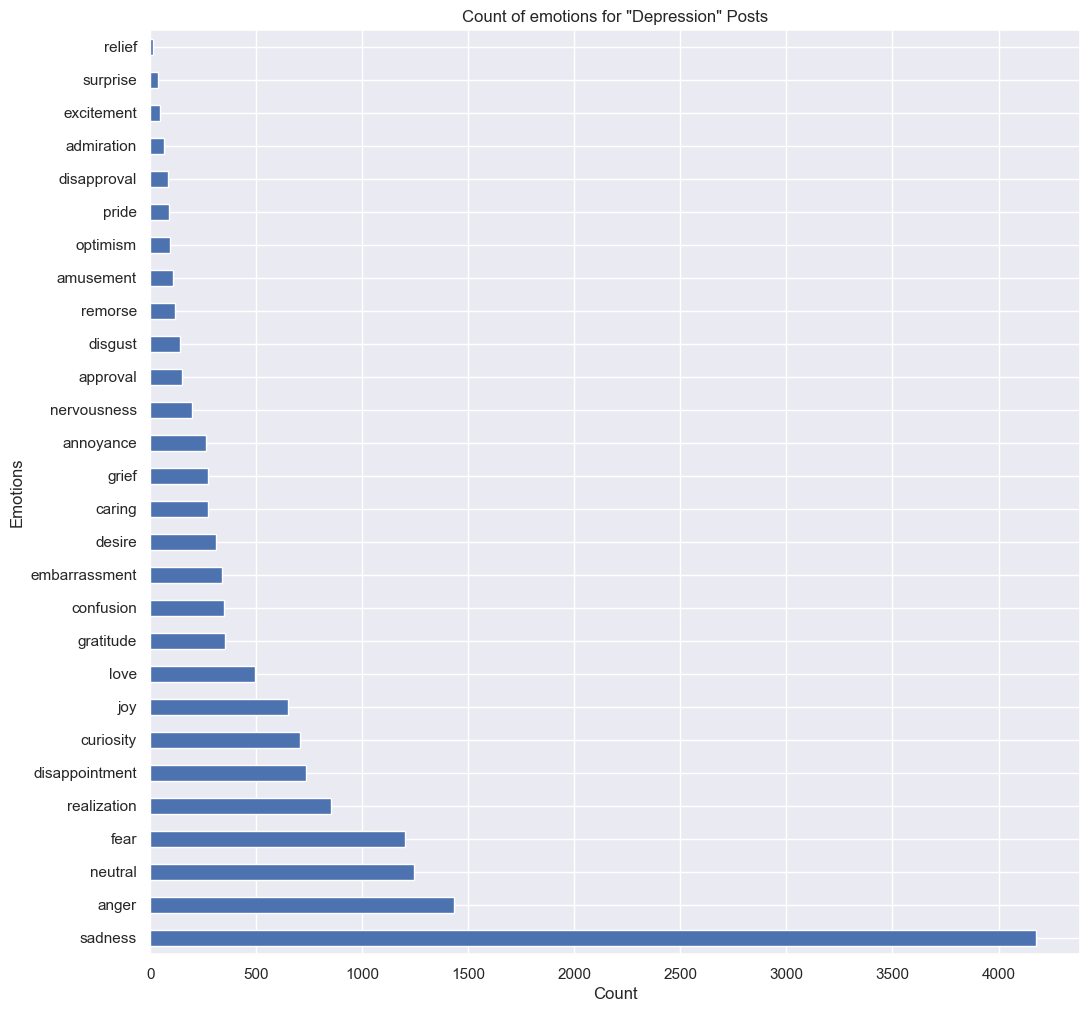

In [12]:
# Plot of top count of emotions for subreddit 'Depression'
plt.figure(figsize=(12,12))
plt.title('Count of emotions for "Depression" Posts')
plt.xlabel('Count')
plt.ylabel('Emotions')
anxiety_depression[anxiety_depression['is_anxiety'] == 0]['labels'].value_counts().plot(kind='barh');

In [13]:
# Look into the top count of emotions for subreddit 'Depression'
anxiety_depression[anxiety_depression['is_anxiety'] == 0][['labels']].value_counts()

labels        
sadness           4176
anger             1435
neutral           1242
fear              1200
realization        852
disappointment     735
curiosity          705
joy                652
love               495
gratitude          353
confusion          350
embarrassment      340
desire             309
grief              275
caring             275
annoyance          262
nervousness        199
approval           148
disgust            141
remorse            119
amusement          106
optimism            92
pride               90
disapproval         84
admiration          65
excitement          48
surprise            37
relief              12
dtype: int64

In [14]:
# Percentage count of emotions of 'Depression' posts
anxiety_depression[anxiety_depression['is_anxiety'] == 0]['labels'].value_counts()/len(anxiety_depression[anxiety_depression['is_anxiety'] == 0])*100

sadness           28.221937
anger              9.697912
neutral            8.393593
fear               8.109752
realization        5.757924
disappointment     4.967223
curiosity          4.764479
joy                4.406299
love               3.345273
gratitude          2.385619
confusion          2.365344
embarrassment      2.297763
desire             2.088261
caring             1.858485
grief              1.858485
annoyance          1.770629
nervousness        1.344867
approval           1.000203
disgust            0.952896
remorse            0.804217
amusement          0.716361
optimism           0.621748
pride              0.608231
disapproval        0.567683
admiration         0.439278
excitement         0.324390
surprise           0.250051
relief             0.081098
Name: labels, dtype: float64

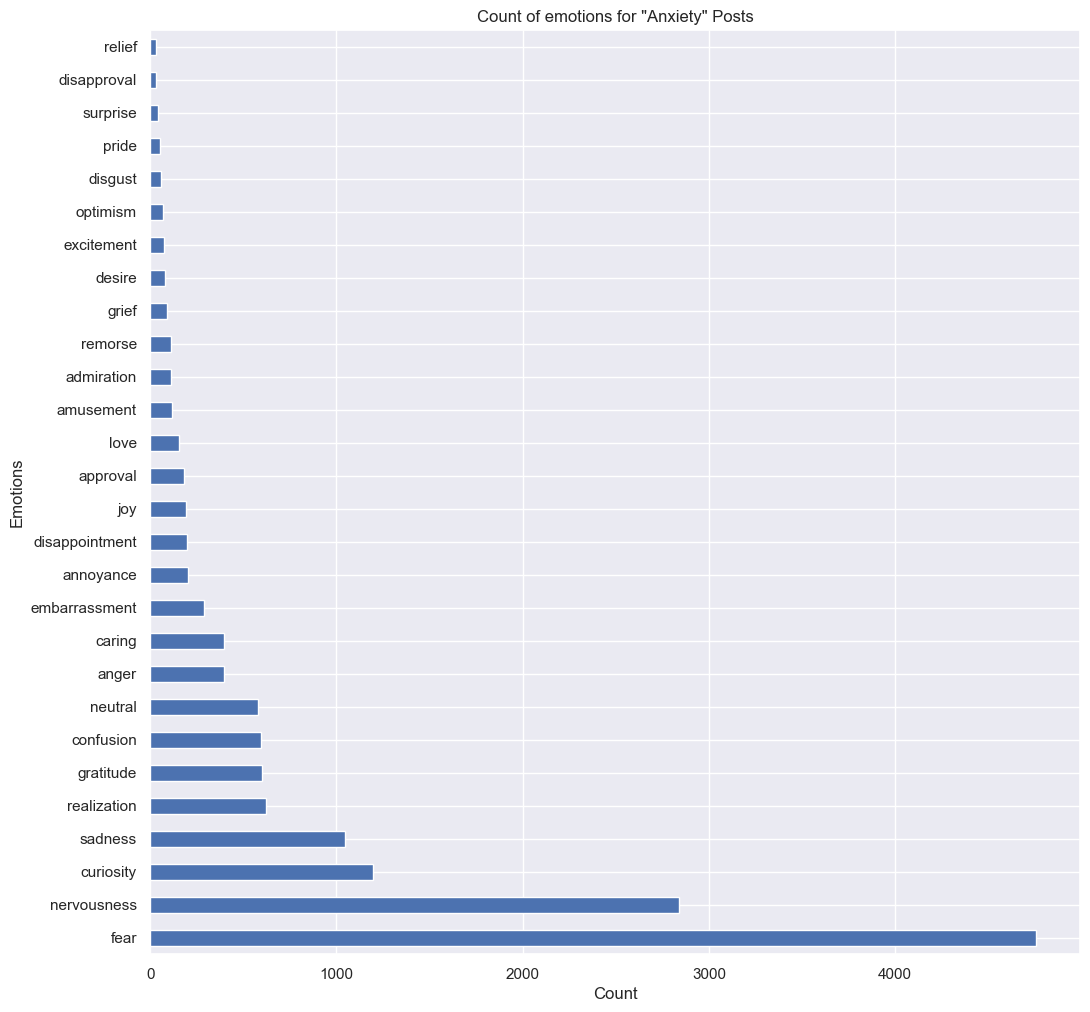

In [15]:
# Plot of top count of emotions for subreddit 'Anxiety'
plt.figure(figsize=(12,12))
plt.title('Count of emotions for "Anxiety" Posts')
plt.xlabel('Count')
plt.ylabel('Emotions')
anxiety_depression[anxiety_depression['is_anxiety'] == 1]['labels'].value_counts().plot(kind='barh');

In [16]:
# Look into the top count of emotions for subreddit 'Anxiety'
anxiety_depression[anxiety_depression['is_anxiety'] == 1][['labels']].value_counts()

labels        
fear              4755
nervousness       2840
curiosity         1199
sadness           1044
realization        624
gratitude          602
confusion          597
neutral            579
anger              398
caring             397
embarrassment      288
annoyance          202
disappointment     198
joy                191
approval           181
love               154
amusement          115
admiration         112
remorse            110
grief               88
desire              81
excitement          74
optimism            68
disgust             58
pride               53
surprise            40
disapproval         33
relief              29
dtype: int64

In [17]:
# Percentage count of emotions of 'Anxiety' posts
anxiety_depression[anxiety_depression['is_anxiety'] == 1]['labels'].value_counts()/len(anxiety_depression[anxiety_depression['is_anxiety'] == 1])*100

fear              31.469226
nervousness       18.795500
curiosity          7.935142
sadness            6.909332
realization        4.129715
gratitude          3.984116
confusion          3.951026
neutral            3.831899
anger              2.634017
caring             2.627399
embarrassment      1.906023
annoyance          1.336863
disappointment     1.310390
joy                1.264064
approval           1.197882
love               1.019193
amusement          0.761085
admiration         0.741231
remorse            0.727995
grief              0.582396
desire             0.536069
excitement         0.489742
optimism           0.450033
disgust            0.383852
pride              0.350761
surprise           0.264725
disapproval        0.218398
relief             0.191926
Name: labels, dtype: float64

In [18]:
# looking into individual text on topic curiosity for common trends
anxiety_depression[(anxiety_depression['is_anxiety'] == 1)&(anxiety_depression['labels'] == 'curiosity')]['title_text_re']

19       I gotta question about hoco So I m invited to ...
29       Why do I have to go to the bathroom immediatel...
38       I F quit all my medication years ago after exp...
49       Analysis and Opinion Pieces Hi all I have said...
63       vistaril experiences especially for chronic da...
                               ...                        
15064    Freaking out more veins showed up in left arm ...
15078    Does cbd help with anxiety Curious about it as...
15082    Why did i het two mouth ulcer after one sex en...
15104    Dizziness Does anyone else deal with chronic d...
15109    Why did i get two mouth ulcers after vaginal s...
Name: title_text_re, Length: 1199, dtype: object

In [19]:
# The classification 'curiosity' is normally tagged with the word 'question', 'why', 'does'.
anxiety_depression.iloc[15236]['title_text_re']

'Why does school make me depressed even though I love school Hello Everybody It has been one month of school now and I have noticed that I am significantly more depressed than I was in the summer This is confusing to me because I absolutely love school I am in a university program that I LOVE I just spend my days pursuing my passion Even my more boring classes I still really enjoy I have friends and great professors and my workload isn t even that bad And yet I find myself just sitting at my desk unable to get started on my school work or disassociating while trying to get work done My room has become a mess it s getting tougher to take care of myself shower get enough sleep eat properly exercise regularly etc I love being productive and having purpose and so it just doesn t make any sense to me that I m more depressed than the summer when I had nothing to do really Does anybody have any insight The only thing I can think of is I used to HATE school I have ADHD and focusing has always 

Using j-hartmann's model it is observed that redditors who post on 'Depression' topics are mostly sad which is mentioned in this article as a [primary symptom](https://www.webmd.com/depression/ss/slideshow-depression-overview)  
On the subreddit 'Anxiety' the highest count of emotion is 'fear' which is corroborated with this article on [anxiety disorder symptoms](https://www.webmd.com/anxiety-panic/guide/anxiety-disorders)

By looking at arpanghoshal's model, the top emotions are largely similar to j-hartmann's model for the with further insights inth how people are feeling when they write their reddit post.

In [20]:
# Saving as csv file
anxiety_depression.to_csv('datasets/anxiety_depression_hugging.csv',index=False)

# Evaulation

|Pipeline|Vectorizer|Estimator|Parameters for Vectorizer|Parameters for Estimator|Train|Test
|----|----|----|----|----|----|----|
|Base|CountVectorizer|Logsitic Regression|-|max_iter = 700|0.971|0.886|
|1|CountVectorizer|Logistic Regression|max_df = 0.9, max_features = 5000, min_df = 2, ngram_range: (1,2), stop_words = custom_stop_words, Tokenizer = StemmTokenizer|c=0.1, max_iter = 700|0.930|0.900|
|2|TFIDF|Logistic Regression|max_df = 0.9, max_features = 3000, min_df = 2, ngram_range: (1,1), stop_words = custom_stop_words, Tokenizer = StemmTokenizer|c=1, max_iter = 700|0.924|0.906|
|3|TFIDF|RandomForest|max_df = 0.9, max_features = 3000, min_df = 2, ngram_range: (1,1), stop_words = custom_stop_words, Tokenizer = StemmTokenizer|max_depth= 4, n_estimators= 200|0.871|0.863|
|Pycaret|TFIDF|Logistic Regression|max_df = 0.9, max_features = 3000, min_df = 2, ngram_range: (1,1), stop_words = custom_stop_words, Tokenizer = StemmTokenizer|c=1, max_iter = 1000|0.926|0.906|

Conclusions
1. Through natural language processing and classification models, How can we classify posts based on the texts used by people who may be depressed or anxious? 
- The pipeline 2 TFIDF vectorizer and Logstic Regression is able to accuracy classify the post with a score of 90%.

2. How can sentiment analysis be utilized to detect primary and secondary emotions from the posts?  
- By using the hugging face models, it provides insights based on the 7 emotions model and 28 emotions model by into the underlying feelings behind redditor's posts.

This is a first stop towards predicting or identifying the emotions associated with mood disorder and could be useful in further development to provide support for people with mental health issues.

Limitations
- This study is limited to 15000 post per study which can be further expanded to cover more posts.
- Limited to these two topics and from reddit posts only.
- The period of study is limited to a few months only, this can be expanded to a few years so that we can check if there is seasonality involved.
- The location of the posts are also unknown where there might be different type of usage of languages depending on where they are from.

Recommendations
- Increase the size of study based on longer duration to understand if there is seasonality involved.
- Broden the scope: The 7 and 28 emotions models could be trained on other platforms such as  twitter and facebook.
- Exploring other languages: Even though the data that were scraped only have english text, on other platforms there might be other languages that would be posted. 
- Identify key words: System will be able to pick up certain emotions and provide support
- Dashboard for moderators: Show the top emotions and possibly allow one to pin a response message
- Examine links with suicide ideation: Flag out potential posts that matches these emotions